# pNML Min Norm Viz

In [1]:
import ast
import os.path as osp
import sys
import time
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as npl
import pandas as pd
import yaml
from matplotlib.ticker import FormatStrFormatter

sys.path.insert(0, "../src/")
from data_utils.synthetic_data_utils import data_type_dict
from post_simulation_utils import load_simulation_results

In [2]:
# Plot params
mpl.style.use("seaborn-dark")
mpl.rcParams["axes.grid"] = True
mpl.rcParams["legend.frameon"] = True
mpl.rcParams["figure.dpi"] = 85
mpl.rcParams["axes.labelsize"] = "large"

# Load simulation resutls

In [8]:
if True:  # Fourier
    base_dirs = [
        #         osp.join("..", "output", "pnml_fourier_3_20201126_151120"),
#         osp.join("..", "output", "pnml_fourier_6_20201126_151129"),
        #         osp.join("..", "output", "pnml_fourier_8_20201126_151137"),
        osp.join("..", "output", "pnml_fourier_10_20201126_151146"),
        osp.join("..", "output", "pnml_fourier_20_20201126_151155"),
        osp.join("..", "output", "pnml_fourier_50_20201126_151158"),
    ]

else:  # Polynomial
    base_dirs = [
        osp.join("..", "output", "pnml_polynomial_4_20201126_151138"),
        osp.join("..", "output", "pnml_polynomial_6_20201126_151146"),
        osp.join("..", "output", "pnml_polynomial_7_20201126_151157"),
    ]

num_features_list, df = load_simulation_results(base_dirs)
print(num_features_list)

[10 20 50]


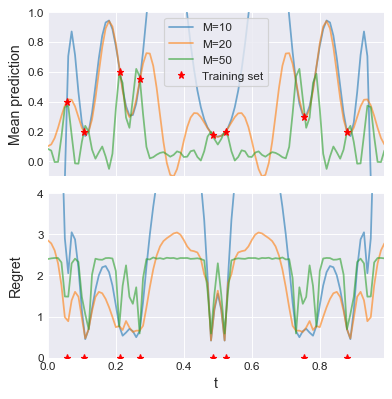

In [9]:
w, h = plt.rcParams.get("figure.figsize")
fig, axs = plt.subplots(2, 1, figsize=(0.8 * w, 1.2 * h), sharex=True)
ax = axs[0]
for num_features in num_features_list:
    df_i = df[df.num_features == num_features]
    x_test, y_hat_erm = df_i["x_test"], df_i["y_hat_erm"]
    x_train = ast.literal_eval(df_i.iloc[0]["x_train"])
    y_train = ast.literal_eval(df_i.iloc[0]["y_train"])
    regret = df_i["regret"]

    ax = axs[0]
    ax.plot(x_test, y_hat_erm, label=f"M={num_features}", alpha=0.6)
    ax.set_ylim(bottom=-0.1,top=1.0)
    
    ax = axs[1]
    ax.plot(x_test, regret, alpha=0.6)
    ax.set_ylim(top=4)
ax = axs[0]
ax.plot(x_train, y_train, "r*", label="Training set")
ax.set_ylabel("Mean prediction")
ax.legend()
ax.set_xlim(x_test.min(), x_test.max())

ax = axs[1]
ax.plot(x_train, [0] * len(y_train), "r*")
ax.set_ylim(bottom=0.0)
ax.set_ylabel("Regret")
ax.set_xlabel("t")
plt.tight_layout()

fig.align_ylabels(axs[:])
plt.savefig("../output/figures/pnml_min_norm_pred_and_regret.pdf")
plt.show()

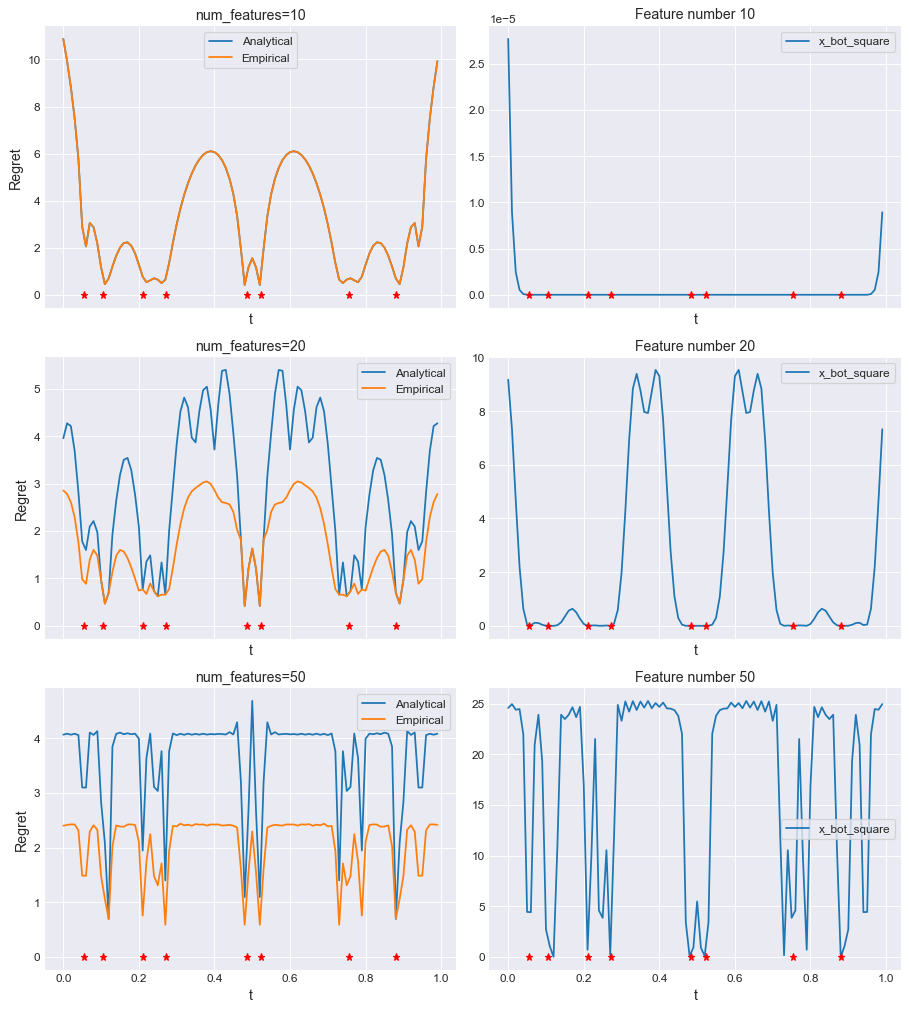

In [10]:
w, h = plt.rcParams.get("figure.figsize")
fig, axs = plt.subplots(
    len(num_features_list), 2, figsize=(1.8 * w, 3 * h), sharex=True
)

if not isinstance(axs, np.ndarray):
    axs = np.ndarray([axs])
if len(axs.shape) == 1:
    axs = np.expand_dims(axs, 0)

for i, num_features in enumerate(num_features_list):
    df_i = df[df.num_features == num_features]
    x_test, y_hat_erm = df_i["x_test"], df_i["y_hat_erm"]
    x_train = ast.literal_eval(df_i.iloc[0]["x_train"])
    y_train = ast.literal_eval(df_i.iloc[0]["y_train"])
    empirical_regret = df_i["regret"]
    analytical_regret = df_i["analytical_regret"]

    ax = axs[i, 0]
    ax.plot(x_test, analytical_regret, label="Analytical")
    ax.plot(x_test, empirical_regret, label="Empirical")
    ax.plot(x_train, [0] * len(y_train), "r*")
    ax.set_title(f"num_features={num_features}")
    ax.set_ylabel("Regret")
    ax.set_xlabel("t")
    ax.legend()

    ax = axs[i, 1]
    for key in ["x_bot_square"]:#, "nf1", "nf2"]:
        ax.plot(x_test, df_i[key], label=key)
    ax.plot(x_train, [0] * len(y_train), "r*")
    ax.set_title(f"Feature number {num_features}")
    ax.legend()
    ax.set_xlabel("t")


plt.tight_layout()
plt.show()

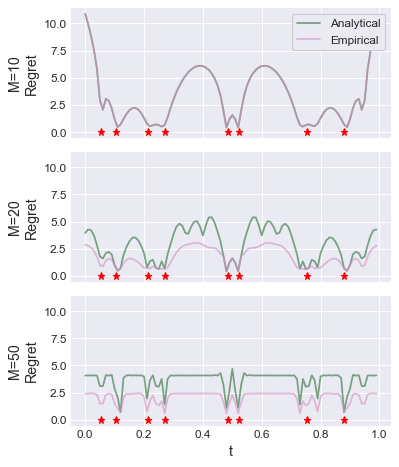

In [14]:
cmap = plt.get_cmap("cubehelix")
indices = np.linspace(0, cmap.N, 10)
my_colors = [cmap(int(i)) for i in indices]

w, h = plt.rcParams.get("figure.figsize")
fig, axs = plt.subplots(
    len(num_features_list), 1, figsize=(0.8 * w, 1.4 * h), sharex=True, sharey=True
)


for i, num_features in enumerate(num_features_list):
    df_i = df[df.num_features == num_features]
    x_test, y_hat_erm = df_i["x_test"], df_i["y_hat_erm"]
    x_train = ast.literal_eval(df_i.iloc[0]["x_train"])
    y_train = ast.literal_eval(df_i.iloc[0]["y_train"])
    empirical_regret = df_i["regret"]
    analytical_regret = df_i["analytical_regret"]

    ax = axs[i]
    ax.plot(x_test, analytical_regret, color=my_colors[3], label="Analytical", alpha=0.6)
    ax.plot(x_test, empirical_regret, color=my_colors[-4], label="Empirical", alpha=0.6)
    ax.plot(x_train, [0] * len(y_train), "r*")
    #     ax.set_title(f"num_features={num_features}")
    ax.set_ylabel(f"M={num_features}\nRegret")
    ax.yaxis.set_major_formatter(FormatStrFormatter("%0.1f"))

axs[0].legend(loc=1, framealpha=0.99)
axs[-1].set_xlabel("t")

fig.align_ylabels(axs)
plt.tight_layout()
plt.savefig("../output/figures/syntetic_data_empirical_vs_analytical.pdf")
plt.show()